In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("Marketing_Spending.csv")
data.head()

,Marketing Spending,Profit
0,165349.20,192261.83
1,162597.70,191792.06
2,153441.51,191050.39
3,144372.41,182901.99
4,142107.34,166187.94


<AxesSubplot:xlabel='Marketing Spending', ylabel='Profit'>

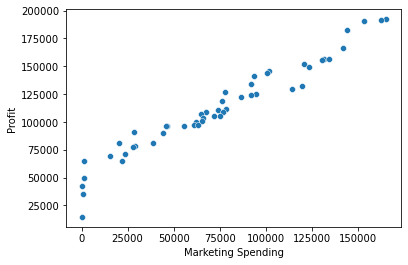

In [151]:
sns.scatterplot(data=data, x="Marketing Spending", y="Profit")

In [152]:
data.describe()

,Marketing Spending,Profit
count,50.000000,50.000000
mean,73721.615600,112012.639200
std,45902.256482,40306.180338
min,0.000000,14681.400000
25%,39936.370000,90138.902500
50%,73051.080000,107978.190000
75%,101602.800000,139765.977500
max,165349.200000,192261.830000


In [153]:
data.isnull().sum()

Marketing Spending    0
Profit                0
dtype: int64

In [154]:
from sklearn.model_selection import train_test_split

target = "Profit"

X = data.drop(target, axis=1)
y = data["Profit"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [155]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numeric_features = X.select_dtypes(include='number').columns

feature_encoder = ColumnTransformer(
    transformers=[('num', StandardScaler(), numeric_features)]
    )

X_train = feature_encoder.fit_transform(X_train)
X_test = feature_encoder.transform(X_test)

In [156]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [157]:
a = model.score(X_train, y_train)
b = model.score(X_test, y_test)

print(a, b)

0.9467864227524652 0.9265108109341951


In [158]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_train, y_train_pred),
      mean_absolute_error(y_test, y_test_pred))

7132.76232218081 6077.363300620399


In [159]:
from sklearn.metrics import mean_absolute_percentage_error

print(mean_absolute_percentage_error(y_train, y_train_pred),
      mean_absolute_percentage_error(y_test, y_test_pred))

0.11633220488839524 0.09136042673622866
